<a href="https://colab.research.google.com/github/fatemakotha/1800-Data-Visualization/blob/main/Lab_02_Exploration_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import the necessary modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###**1 - Read in the data from the file Pages/DailyHits.csv (https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv)**

In [2]:
#Read DailyHits.csv
dataframe = pd.read_csv("https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv", index_col=0)
dataframe

,001,002,003,004,005,006,007,008,009,010,...,158,159,160,161,162,163,164,165,166,167
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1062,33,67,42,0,4,0,0,1,69,...,0,0,4,0,10,2,2,2,0,0
2019-01-02,976,41,72,19,2,0,0,14,1,62,...,5,0,0,7,0,0,0,0,1,3
2019-01-03,956,27,71,28,4,6,11,0,0,64,...,0,0,0,0,6,0,0,3,0,0
2019-01-04,976,30,57,29,0,0,3,0,2,52,...,0,2,0,0,0,0,0,0,0,7
2019-01-05,956,45,65,27,4,1,0,0,0,55,...,12,0,0,4,0,0,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1065,46,76,24,0,0,0,2,0,30,...,4,1,0,0,0,0,0,2,0,0
2019-12-28,1135,55,87,41,1,0,0,0,0,19,...,0,0,0,3,0,4,1,1,5,4
2019-12-29,1125,64,92,24,0,2,0,0,3,32,...,0,2,0,0,3,0,0,0,0,1


###**2 - Create a column showing the total number of hits for all pages.**

In [3]:
#Use .sum() to calculate the total number of hits per page:
summed_df = dataframe.sum()
summed_df

001    379682
002     17401
003     27249
004     11668
005       533
        ...  
163       872
164       360
165       685
166       966
167      1196
Length: 167, dtype: int64

##**3 - Create a bar chart showing the total number of hits for all pages.**
Most pages only have relatively few hits.
How many pages have a significant number? Note chart will almost certainly be unreadable, so you will need to do this by sorting the data first and then ***printing out the first 15 entries or so using something like the code below:***

In [4]:
#Reindex to go. from highest to lowest value, as ascending=False
dataframe = dataframe.reindex(dataframe.sum().sort_values(ascending=False).index, axis=1)
print(dataframe.sum().head(15))

015    467123
001    379682
003     27249
080     23357
155     22183
156     21966
048     19229
002     17401
010     17046
004     11668
008      1487
122      1483
092      1450
018      1430
045      1422
dtype: int64


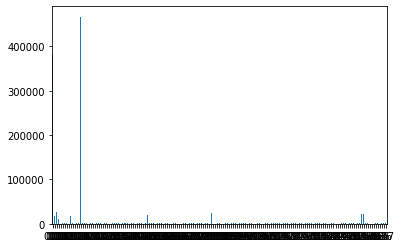

In [5]:
#METHOD - 1 
from pandas.io.formats.style_render import DataFrame
summed_df.plot.bar(x='Page no', y='NoOfHits', rot=0)

In [6]:
summed_df

001    379682
002     17401
003     27249
004     11668
005       533
        ...  
163       872
164       360
165       685
166       966
167      1196
Length: 167, dtype: int64

##**Parameters:**
###1) x : xfloat or array-like
    The x coordinates of the bars. See also align for the alignment of the bars to the coordinates.

###2) height : heightfloat or array-like
    The height(s) of the bars.

###3)width : widthfloat or array-like, default: 0.8
    The width(s) of the bars.

###4) bottom : bottomfloat or array-like, default: 0

###5) align: The y coordinate(s) of the bottom side(s) of the bars.
    align{'center', 'edge'}, default: 'center'

Text(0.5, 1.0, 'Total Hits per page')

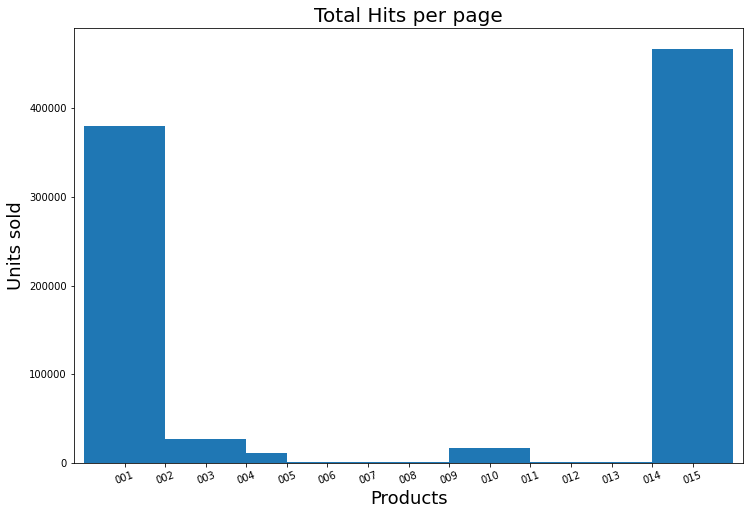

In [7]:
#METHOD - 2
#Create a Bar chart of the first 15 elements 
summed_df[:15].plot.bar(width=2, rot=20, figsize=(12, 8), x=float, align="center") #rot makes the y ticks rotate **
# plt.bar(x=float, align="center", height)
plt.xlabel('Products', fontsize=18)
plt.ylabel('Units sold', fontsize=18)
plt.title('Total Hits per page', fontsize=20)


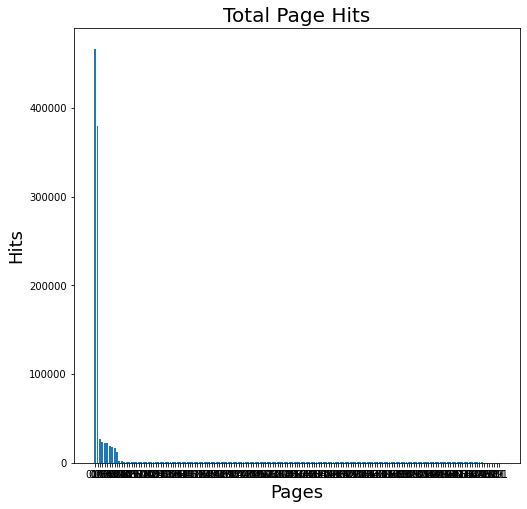

In [14]:
#Teachers way of doing it: ***
#The 4 lines below are standard code for a Bar chart:
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(dataframe.columns))
plt.bar(x_pos, dataframe.sum(), align='center')
plt.xticks(x_pos, dataframe.columns)
#-------------------------------------------------------
plt.xlabel('Pages', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('Total Page Hits', fontsize=20)
plt.show()

##**4 - Create a bar chart showing the total number of hits for high volume pages.**
We cannot do that using the chart as the chart is not very readable, so instead we will use the reindexed/sorted values.\

In [15]:
print(dataframe.sum().head(15))

015    467123
001    379682
003     27249
080     23357
155     22183
156     21966
048     19229
002     17401
010     17046
004     11668
008      1487
122      1483
092      1450
018      1430
045      1422
dtype: int64


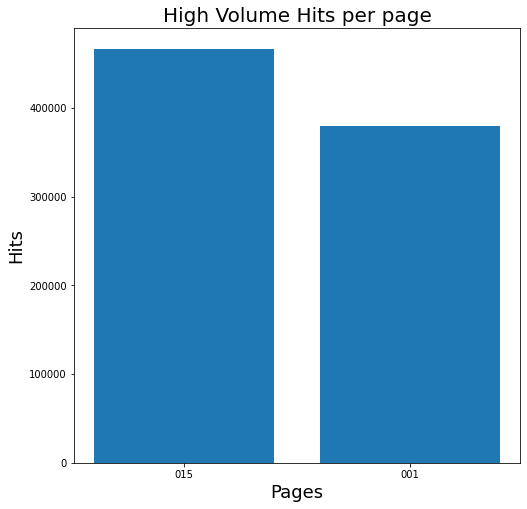

In [17]:
selected = ["015", "001"]

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(dataframe[selected].columns))
plt.bar(x_pos, dataframe[selected].sum(), align='center')
plt.xticks(x_pos, dataframe[selected].columns)
plt.xlabel('Pages', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('High Volume Hits per page', fontsize=20)
plt.show()

##**4) Create a bar chart showing the total number of hits for medium volume pages**

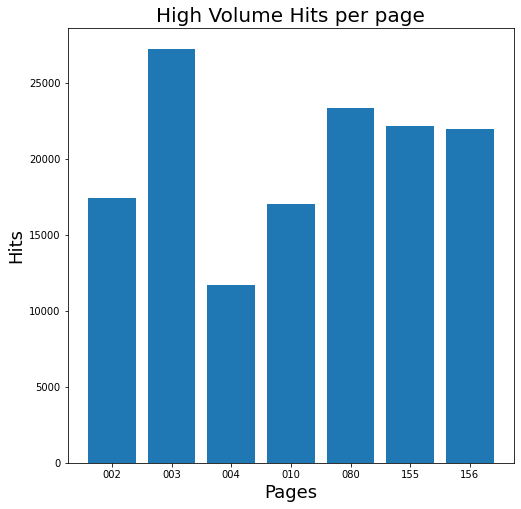

In [18]:
selected = ["002", "003", "004", "010", "080", "155", "156"]

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(dataframe[selected].columns))
plt.bar(x_pos, dataframe[selected].sum(), align='center')
plt.xticks(x_pos, dataframe[selected].columns)
plt.xlabel('Pages', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('High Volume Hits per page', fontsize=20)
plt.show()

## **5) Create a bar chart showing the total number of hits for low volume pages. Hint: this is a bit harder than the lecture example as there are too many low volume pages for you to list them all. Instead, select the columns by value as described last week. **

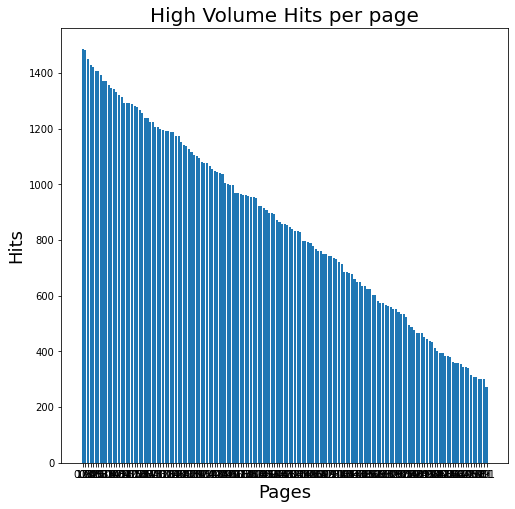

In [19]:
selected = dataframe.columns[dataframe.sum() < 5000]
# selected = dataframe.columns[dataframe.sum() < 5_000] the line above has 500, this line is also 5000 ***
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(dataframe[selected].columns))
plt.bar(x_pos, dataframe[selected].sum(), align='center')
plt.xticks(x_pos, dataframe[selected].columns)
plt.xlabel('Pages', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('High Volume Hits per page', fontsize=20)
plt.show()

##**6) Now by modifying the code in 06BarChartAutomatic.py, create a code block in your Notebook that automatically classifies pages into high, medium and low volume pages. You will need to decide the boundaries for each type. Your code block should produce 3 bar charts. [Hint: if you modified the data in item 5 above by dropping columns, you will need to read it in again in this block.]**

In [27]:
dataframe.columns

Index(['015', '001', '003', '080', '155', '156', '048', '002', '010', '004',
       ...
       '159', '022', '126', '029', '059', '138', '160', '079', '081', '101'],
      dtype='object', length=167)

[['015', '001'], ['003', '080', '155', '156', '048', '002', '010', '004'], ['008', '122', '092', '018', '045', '025', '088', '151', '051', '038', '104', '134', '097', '108', '075', '034', '021', '041', '130', '055', '125', '078', '028', '121', '037', '067', '084', '141', '071', '133', '137', '167', '118', '017', '114', '062', '158', '147', '054', '100', '011', '058', '033', '129', '154', '007', '095', '074', '117', '124', '044', '113', '020', '024', '070', '107', '096', '140', '111', '150', '061', '166', '077', '050', '136', '091', '087', '153', '103', '040', '036', '146', '057', '157', '094', '163', '014', '132', '083', '053', '031', '066', '073', '120', '049', '016', '032', '149', '127', '006', '069', '116', '162', '047', '099', '112', '128', '090', '027', '110', '013', '145', '165', '023', '043', '060', '143', '161', '139', '065', '086', '076', '152', '056', '106', '009', '093', '135', '052', '039', '019', '123', '082', '030', '005', '072', '035', '089', '148', '102', '026', '109', 

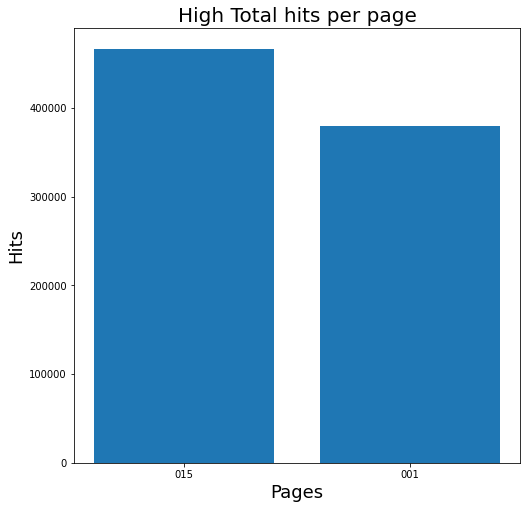

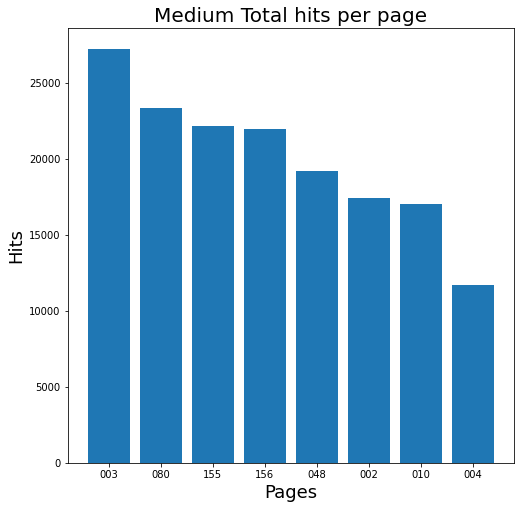

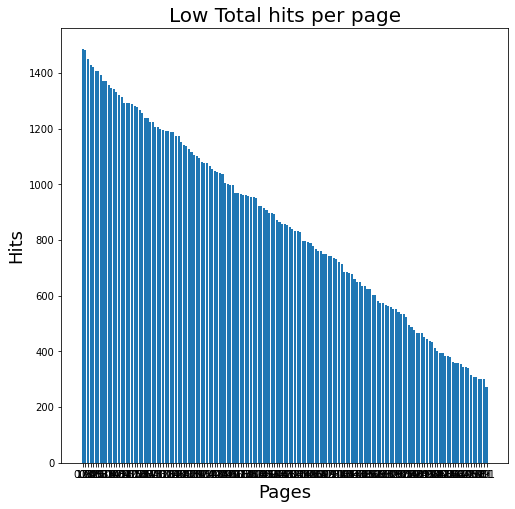

In [57]:
categories = ['High', 'Medium', 'Low']
categories_selected = [[] for i in range(len(categories))] #THIS WILL CREATE THREE DIFFERENT *EMPTY* LISTS INSIDE ONE LIST 
#i.e. categories_selected = [["High"], ["Medium"], ["Low"]] i.e. categories_selected = [["001", "002"], ["015"], ["009"]]
#PRINTS: [[], [], []] ***
# categories_selected = [[] for i in range(3))]
#categories_selected = [[] for i in range(0, 3))]
#categories_selected = [[], [], []] for i in range(0, 3))] which means 3 brackets **

#---OR YOU CAN WRITE THIS:
# categories_selected = []
# for i in range(len(categories)):
#    categories_selected.append([])
#    print(categories_selected)
#PRINTS: [[], [], []]


#THE CODE BELOW CREATES A LIST OF COLUMNS FOR EACH CATEGORY
for name in dataframe.columns:
#for name in ['015', '001', '003', '080', .......
#for 015 in ['015', '001', '003', '080', .......
    total_hits = dataframe[name].sum()
    # total_sales = dataframe["015"].sum() #obtains the sum for page "015"
    if total_hits > 100000:
    #if sum for that page is less than 100000:
        category = 0
    elif total_hits > 5000:
    #elif sum for that page is less than 40000:
        category = 1
    else:
        category = 2
    categories_selected[category].append(name)
    #categories_selected[lets say 2].append("Low")

    # print('Product ' + name + ' is ' + categories[category] + ' volume')


print(categories_selected)
#PRINTS: [['015', '001', '003', '080', '155', '156', '048', '002', '010', '004', '008', '122', '092', '018', '045', 
        # '025', '088', '151', '051', '038', '104', '134', '097', '108', '075', '034', '021', '041', '130', '055', '125', '078', '028', '121', '037', '067', '084', '141', '071', 
        # '133', '137', '167', '118', '017', '114', '062', '158', '147', '054', '100', '011', '058', '033', '129', '154', '007', '095', '074', '117', '124', '044', '113', '020', 
        # '024', '070', '107', '096', '140', '111', '150', '061', '166', '077', '050', '136', '091', '087', '153', '103', '040', '036', '146', '057', '157', '094', '163', '014', '132',
        # '083', '053', '031', '066', '073', '120', '049', '016', '032', '149', '127', '006', '069', '116', '162', '047', '099', '112', '128', '090', '027', '110', '013', '145', '165', 
        # '023', '043', '060', '143', '161', '139', '065', '086', '076', '152', '056', '106', '009', '093', '135', '052', '039', '019', '123', '082', '030', '005', '072', '035', '089', 
        # '148', '102', '026', '109', '046', '119', '098', '131', '068', '105', '042', '063', '142', '115', '085', '144', '012', '164', '064', '159', '022', '126', '029', '059', '138', 
        #'160', '079', '081', '101'], [], []]





# #THE CODE BELOW JUST PRINTS THEM OUT
# for i in range(len(categories)):
#     print(categories[i] + ': ' + str(categories_selected[i]))

#THE CODE BELOW DOES THE VISUALIZATION FOR EACH OF THE VISUALISATION:
for i, selected in enumerate(categories_selected):
    plt.figure(figsize=(8, 8))
    x_pos = np.arange(len(dataframe[selected].columns))
    plt.bar(x_pos, dataframe[selected].sum(), align='center')
    plt.xticks(x_pos, dataframe[selected].columns)
    plt.xlabel('Pages', fontsize=18)
    plt.ylabel('Hits', fontsize=18)
    plt.title(categories[i] + ' Total hits per page', fontsize=20)
    plt.show()

##**7) Finally create a pie chart summarising your findings. The pie sections should be sorted in order of decreasing page hits (like the ones in the lecture are sorted in order of decreasing sales) and all the low volume pages should be grouped together into one pie segment.**

In [58]:
#REMEMBER WE ALREADY SORTED THE DATA USING dataframe.reindex() *****

             015   001  003  080  155  156  048  002  010  004  Others  Others
Date                                                                          
2019-01-01  1184  1062   67   67   39   47   37   33   69   42     358     358
2019-01-02  1266   976   72   61   59   56   39   41   62   19     419     419
2019-01-03  1047   956   71   44   58   46   38   27   64   28     352     352
2019-01-04  1108   976   57   61   39   52   35   30   52   29     291     291
2019-01-05  1214   956   65   61   40   41   45   45   55   27     447     447


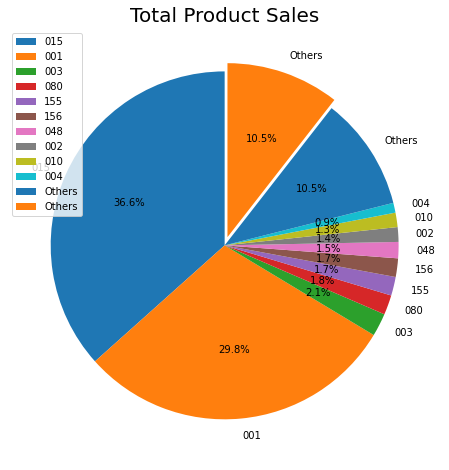

In [66]:
explodeList = []
selected = []
columns = dataframe.columns
dataframe['Others'] = [0] * len(dataframe.index)
for name in columns:
    total_sales = dataframe[name].sum()
    if total_sales > 5000:
        selected.append(name)
        explodeList.append(0)
    else:
        dataframe['Others'] += dataframe[name]
selected.append('Others')
explodeList.append(0.05)
print(dataframe[selected].head())

plt.figure(figsize=(8, 8))
plt.pie(dataframe[selected].sum(), labels=selected, autopct='%1.1f%%', startangle=90, explode=explodeList)
plt.title('Total Product Sales', fontsize=20)
plt.legend(loc=2)
plt.show()

             015   001  003  080  155  156  048  002  010  004  Others  Others
Date                                                                          
2019-01-01  1184  1062   67   67   39   47   37   33   69   42     358     358
2019-01-02  1266   976   72   61   59   56   39   41   62   19     419     419
2019-01-03  1047   956   71   44   58   46   38   27   64   28     352     352
2019-01-04  1108   976   57   61   39   52   35   30   52   29     291     291
2019-01-05  1214   956   65   61   40   41   45   45   55   27     447     447


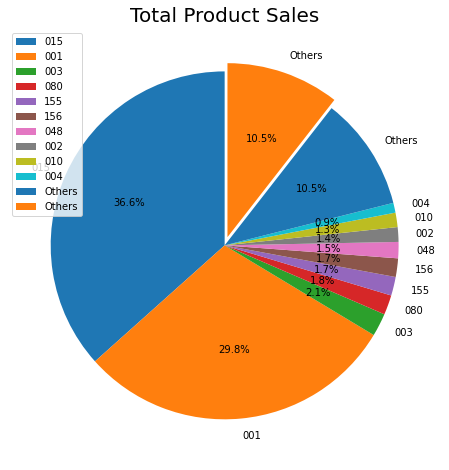

In [71]:
explodeList = []
selected = []
columns = dataframe.columns
dataframe['Others'] = [0] * len(dataframe.index)
for name in columns:
    total_sales = dataframe[name].sum()
    if total_sales > 5000:
        selected.append(name)
        explodeList.append(0)
    else:
        dataframe['Others'] += dataframe[name]
selected.append('Others')
explodeList.append(0.05)
print(dataframe[selected].head())

plt.figure(figsize=(8, 8))
plt.pie(dataframe[selected].sum(), labels=selected, autopct='%1.1f%%', startangle=90, explode=explodeList)
plt.title('Total Product Sales', fontsize=20)
plt.legend(loc=2)
plt.show()